In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
import sys
from datetime import datetime
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.cross_validation import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA


In [118]:
# Dividing the training and testing data in the ratio 70 : 30 
df = pickle.load( open( "df_train_api.pk", "rb" ) )

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)


In [119]:

def munge(data):
    data[['ver', 'ty','ht', 'wd']] = data['type'].apply(pd.Series)
    data[['min_x', 'min_y','max_x', 'max_y','x', 'y']] = data['coords'].apply(pd.Series)
    # Creating a new feature 1
    temp_df1 = pd.DataFrame({'groups': data.groups.unique(), 'groups_new':range(len(data.groups.unique()))})
    data = data.merge(temp_df1, on='groups', how='left')
    # Creating a new feature 2
    temp_df2 = pd.DataFrame({'data': data.data.unique(), 'data_new':range(len(data.data.unique()))})
    data = data.merge(temp_df2, on='data', how='left')
    # Creating a new feature 3 
    temp_df3 = pd.DataFrame({'ver': data.ver.unique(), 'ver_new':range(len(data.ver.unique()))})
    data = data.merge(temp_df3, on='ver', how='left')
    data['pos_x'] = data['y'].astype(float)/data['wd'].astype(float)
    data['pos_y'] = data['x'].astype(float)/data['ht'].astype(float)
    return data.drop(['coords','min_x','min_y','max_x','max_y','type','ty','ver','data','groups'],axis=1)

train = munge(train)
test = munge(test)
train.tail(10)


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,label,ht,wd,x,y,groups_new,data_new,ver_new,pos_x,pos_y
3317,0,3508,2475,282.0,2678.0,198,13,159,1.082020,0.080388
3318,0,3508,2479,511.5,538.5,1234,6,966,0.217225,0.145810
3319,0,2964,2424,1808.0,2095.0,2054,33,3,0.864274,0.609987
3320,0,3300,2550,2236.5,1966.0,586,60,3,0.770980,0.677727
3321,2,3508,2480,1550.5,630.5,2502,32,1863,0.254234,0.441990
3322,0,2964,2424,1807.5,2210.5,701,33,3,0.911922,0.609818
3323,0,3507,2481,2173.0,2969.0,1103,28,863,1.196695,0.619618
3324,0,2338,1700,851.0,171.5,159,19,132,0.100882,0.363986
3325,0,890,670,93.0,544.0,2503,40,1864,0.811940,0.104494
3326,0,3508,2479,1941.0,3039.5,2504,25,3,1.226099,0.553307


In [121]:

train_X = train[['ht','wd','x','y','groups_new','ver_new','data_new','pos_x','pos_y']] # taking the training data features
train_y = train.label # output of the training data

test_X = test[['ht','wd','x','y','groups_new','ver_new','data_new','pos_x','pos_y']] # taking test data feature
test_y = test.label # output value of the test data


In [122]:
train_X.head()

,ht,wd,x,y,groups_new,ver_new,data_new,pos_x,pos_y
0,3300,2550,1393.5,788.0,0,0,0,0.309020,0.422273
1,2337,1653,1126.0,530.0,1,1,1,0.320629,0.481814
2,3507,2550,328.0,289.0,2,2,2,0.113333,0.093527
3,2337,1653,942.5,1453.0,3,3,3,0.879008,0.403295
4,3508,2480,1529.5,908.0,4,4,4,0.366129,0.436003


In [123]:
test_X.head()

,ht,wd,x,y,groups_new,ver_new,data_new,pos_x,pos_y
0,3300,2550,243.5,3013.0,0,0,0,1.181569,0.073788
1,2337,1653,1028.5,847.0,1,1,1,0.512402,0.440094
2,3508,2479,1852.5,818.0,2,2,2,0.329972,0.528079
3,3508,2480,2220.0,1779.0,3,3,3,0.717339,0.632839
4,3300,2550,423.5,298.5,4,4,4,0.117059,0.128333


In [124]:
train_y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [125]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.8878766643307638


In [126]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.948843728100911


In [128]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9390329362298528


([<matplotlib.axis.XTick at 0x7f0b5bd5ce48>,
 <a list of 10 Text xticklabel objects>)

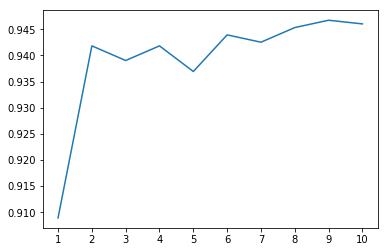

In [129]:
# Let's check the accuracy for various values of n for K-Nearest nerighbours
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

In [133]:
from sklearn import model_selection
import pickle

model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)
# save the model to disk
filename = 'finalized_model.pk'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_X, test_y)
print(result)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output


0.948843728100911
The accuracy of the SVM is:  0.948843728100911


In [138]:
fin = pickle.load( open( "finalized_model.pk", "rb" ) )
fin

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)